In [212]:
# coffee data summary

In [213]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [9]:
Y=np.loadtxt('Reflection2_00001.txt').T[0,]
np.savetxt('Class',Y)
Y=np.loadtxt('Class')
X=pd.read_csv('Coffee.csv')
X=X[40:890]
Y[300],Y[1600]

(325.441, 865.397)

In [10]:
x=X.T
X_n=x[300:1600].T
X_n.shape

(850, 1300)

In [11]:
# since there are some unlabeled data, so LDA is not very suitable. So I choose to use unsupervised learning to reduce dimension.
# By the unsupervised learning methods, we can also mark the unlabeled data using the model we find in our work.

In [14]:
pca=PCA(n_components=0.99)
X_PCA=pca.fit_transform(X_n)
ICA = FastICA(n_components=10,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_PCA.shape

(850, 5)

In [15]:
X_tsne = TSNE(n_components=3, n_iter=500).fit_transform(X_n)
lle=LocallyLinearEmbedding(n_components=10,n_neighbors=40)
X_lle=lle.fit_transform(X_n)

In [16]:
from numpy import array

In [18]:
# first use 1,2,3,...to present the different class:
# "1": health good
# "2": rust
# "3": infected green canopy
# "4": geisha
# "5": geisha cannopy
# "6": yellow
# "7": yellow green
# "8": Young_Rust_Yellow
# "9": Young_Rust_Green_Leaf

target_labeled=array(["8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","9","9","9","9","9","9","9","9",
                      "9","9","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","3","3","3","3","3","3","3","3","3","3",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5",
             "5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5"])
len(target_labeled)

730

In [19]:
np.savetxt('New_X',X_n)
np.savetxt("PCA",X_PCA)
np.savetxt("ICA",X_ICA)
np.savetxt("LLE",X_lle)
np.savetxt('TSNE',X_tsne)
X_new=np.loadtxt('New_X')
X_Pca=np.loadtxt("PCA")
X_ICA=np.loadtxt("ICA")
X_lle=np.loadtxt("LLE")
X_tsne=np.loadtxt("TSNE")

In [21]:
X_tsne_labeled=np.vstack((X_tsne[0:40],X_tsne[50:70],X_tsne[80:90],X_tsne[160:220],X_tsne[230:600],X_tsne[610:800],X_tsne[810:890]))
X_tsne_unlabeled=np.vstack((X_tsne[40:50],X_tsne[70:80],X_tsne[90:160],X_tsne[220:230],X_tsne[600:610],X_tsne[800:810]))
X_Pca_labeled=np.vstack((X_Pca[0:40],X_Pca[50:70],X_Pca[80:90],X_Pca[160:220],X_Pca[230:600],X_Pca[610:800],X_Pca[810:890]))
X_Pca_unlabeled=np.vstack((X_Pca[40:50],X_Pca[70:80],X_Pca[90:160],X_Pca[220:230],X_Pca[600:610],X_Pca[800:810]))
X_ICA_labeled=np.vstack((X_ICA[0:40],X_ICA[50:70],X_ICA[80:90],X_ICA[160:220],X_ICA[230:600],X_ICA[610:800],X_ICA[810:890]))
X_ICA_unlabeled=np.vstack((X_ICA[40:50],X_ICA[70:80],X_ICA[90:160],X_ICA[220:230],X_ICA[600:610],X_ICA[800:810]))
X_lle_labeled=np.vstack((X_lle[0:40],X_lle[50:70],X_lle[80:90],X_lle[160:220],X_lle[230:600],X_lle[610:800],X_lle[810:890]))
X_lle_unlabeled=np.vstack((X_lle[40:50],X_lle[70:80],X_lle[90:160],X_lle[220:230],X_lle[600:610],X_lle[800:810]))
X_labeled=np.vstack((X_new[0:40],X_new[50:70],X_new[80:90],X_new[160:220],X_new[230:600],X_new[610:800],X_new[810:890]))
X_unlabeled=np.vstack((X_new[40:50],X_new[70:80],X_new[90:160],X_new[220:230],X_new[600:610],X_new[800:810]))

X.shape,X_labeled.shape

((850, 2048), (730, 1300))

In [131]:
# in this part just see roughly the classification effect, split the train and test data
x_train, x_test, y_train, y_test = train_test_split(X_labeled,target_labeled, test_size=0.3)
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(X_Pca_labeled,target_labeled, test_size=0.3)
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
xlle_train, xlle_test, ylle_train, ylle_test = train_test_split(X_lle_labeled,target_labeled, test_size=0.3)
xtsne_train, xtsne_test, ytsne_train, ytsne_test = train_test_split(X_tsne_labeled,target_labeled, test_size=0.3)

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# gamma=1/2*var, where var=sigma^2, sigma is the range the support vector can explain, so after roughly calculate the distance between
# vectoes, can roughly limit the range of sigma.Then uue gride to find the better gamma and C.

In [24]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,3,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)

In [25]:
search1 = clf.fit(x_train, y_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.0021209508879201904, 'C': 4.714866363457395}

In [26]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,3,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)
search2 = clf.fit(xpca_train, ypca_train)
search2.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.0021209508879201904, 'C': 4.714866363457395}

In [45]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,2,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)
search4 = clf.fit(xtsne_train, ytsne_train)
search4.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.3393221771895326, 'C': 7.543120063354623}

In [46]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,2,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)
search5 = clf.fit(xlle_train, ylle_train)
search5.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 3.2374575428176433, 'C': 19.306977288832496}

In [36]:
clf1= SVC(C=4.7,kernel='rbf',gamma=0.002)
clf1.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, clf1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, clf1.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, clf1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, clf1.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.8767123287671232
Kappa_train： 1.0
Kappa_test： 0.8399945880124475


In [37]:
# Then find may overfitting, so try to use bagging.

In [38]:
from sklearn.ensemble import BaggingClassifier
bagging1 = BaggingClassifier(clf1,max_samples=0.6, max_features=0.6)
bagging1.fit(x_train,y_train)
print ('accuracy_train：', accuracy_score(y_train, bagging1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, bagging1.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, bagging1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, bagging1.predict(x_test)))

accuracy_train： 0.9217221135029354
accuracy_test： 0.8310502283105022
Kappa_train： 0.8986879996827805
Kappa_test： 0.7788784281620957


In [39]:
clf2= SVC(C=4.7,kernel='rbf',gamma=0.002)
clf2.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, clf2.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, clf2.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, clf2.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, clf2.predict(xpca_test)))

accuracy_train： 0.9941291585127201
accuracy_test： 0.867579908675799
Kappa_train： 0.9925331333076807
Kappa_test： 0.8264374726716222


In [51]:
clf3= SVC(C=7.5,kernel='rbf',gamma=0.34)
clf3.fit(xtsne_train, ytsne_train)
print ('accuracy_train：', accuracy_score(ytsne_train, clf3.predict(xtsne_train)))
print ('accuracy_test：', accuracy_score(ytsne_test, clf3.predict(xtsne_test)))
print ('Kappa_train：', cohen_kappa_score(ytsne_train, clf3.predict(xtsne_train)))
print ('Kappa_test：', cohen_kappa_score(ytsne_test, clf3.predict(xtsne_test)))

accuracy_train： 0.9902152641878669
accuracy_test： 0.9360730593607306
Kappa_train： 0.9874878183750324
Kappa_test： 0.9182247352839197


In [67]:
clf4= SVC(C=20,kernel='rbf',gamma=4)
clf4.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, clf4.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, clf4.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, clf4.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, clf4.predict(xlle_test)))

accuracy_train： 0.8101761252446184
accuracy_test： 0.8082191780821918
Kappa_train： 0.7548954645251894
Kappa_test： 0.7498980340973977


In [68]:
# Then we consider the tree models, to avoid overfitting, roughly set a depth.

In [100]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=12)
clf_tree1 = tree.DecisionTreeClassifier(max_depth=7)
clf_tree2 = tree.DecisionTreeClassifier(max_depth=9)

In [95]:
clf_tree.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, clf_tree.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, clf_tree.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, clf_tree.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, clf_tree.predict(x_test)))

accuracy_train： 0.9863013698630136
accuracy_test： 0.867579908675799
Kappa_train： 0.982501369755792
Kappa_test： 0.8317749582814611


In [96]:
clf_tree.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, clf_tree.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, clf_tree.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, clf_tree.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, clf_tree.predict(xpca_test)))

accuracy_train： 0.9510763209393346
accuracy_test： 0.8447488584474886
Kappa_train： 0.937900728663857
Kappa_test： 0.7999946278438851


In [97]:
clf_tree1.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, clf_tree1.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, clf_tree1.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, clf_tree1.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, clf_tree1.predict(xIca_test)))

accuracy_train： 0.9667318982387475
accuracy_test： 0.9223744292237442
Kappa_train： 0.9573503925217126
Kappa_test： 0.9008337106784221


In [101]:
clf_tree2.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, clf_tree2.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, clf_tree2.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, clf_tree2.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, clf_tree2.predict(xlle_test)))

accuracy_train： 0.9784735812133072
accuracy_test： 0.9269406392694064
Kappa_train： 0.9724474290475957
Kappa_test： 0.9069174370417596


In [102]:
# for randomforest model, also set a max_depth to avoid overfitting

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [104]:
randomforest = RandomForestClassifier(max_depth=8)

In [105]:
randomforest.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, randomforest.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, randomforest.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, randomforest.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, randomforest.predict(x_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_train： 0.9647749510763209
accuracy_test： 0.8904109589041096
Kappa_train： 0.9549607779769075
Kappa_test： 0.8596603652675424


In [106]:
randomforest.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, randomforest.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, randomforest.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, randomforest.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, randomforest.predict(xpca_test)))

accuracy_train： 0.9256360078277887
accuracy_test： 0.867579908675799
Kappa_train： 0.9055756007897066
Kappa_test： 0.828620001079389


In [108]:
randomforest.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, randomforest.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, randomforest.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, randomforest.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, randomforest.predict(xIca_test)))

accuracy_train： 0.9921722113502935
accuracy_test： 0.9452054794520548
Kappa_train： 0.9899948113992579
Kappa_test： 0.9302825308396339


In [109]:
randomforest.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, randomforest.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, randomforest.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, randomforest.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, randomforest.predict(xlle_test)))

accuracy_train： 0.9706457925636007
accuracy_test： 0.8904109589041096
Kappa_train： 0.9625119213557333
Kappa_test： 0.8604354753053638


In [173]:
# The consider the GBDT.

In [113]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=40,learning_rate=0.05)

In [114]:
GradientBoosting1.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, GradientBoosting1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, GradientBoosting1.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, GradientBoosting1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, GradientBoosting1.predict(x_test)))

accuracy_train： 0.9823874755381604
accuracy_test： 0.8858447488584474
Kappa_train： 0.9774881052610969
Kappa_test： 0.8536526690010959


In [115]:
GradientBoosting1.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, GradientBoosting1.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, GradientBoosting1.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, GradientBoosting1.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, GradientBoosting1.predict(xpca_test)))

accuracy_train： 0.9706457925636007
accuracy_test： 0.8949771689497716
Kappa_train： 0.9626945577370465
Kappa_test： 0.8635957429523113


In [116]:
GradientBoosting1.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, GradientBoosting1.predict(xIca_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9223744292237442
Kappa_train： 0.9974948647177924
Kappa_test： 0.9014844804318489


In [118]:
GradientBoosting1.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, GradientBoosting1.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, GradientBoosting1.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, GradientBoosting1.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, GradientBoosting1.predict(xlle_test)))

accuracy_train： 0.974559686888454
accuracy_test： 0.8949771689497716
Kappa_train： 0.9674996819929745
Kappa_test： 0.8659909011094261


In [174]:
# Then consider a improvement of GBDT, which is xgboost

In [122]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [123]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [124]:
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree

In [141]:
xgboost = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [151]:
xgboost.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, xgboost.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, xgboost.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, xgboost.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, xgboost.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.9041095890410958
Kappa_train： 1.0
Kappa_test： 0.8764307593100112


In [176]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(X_Pca_labeled,target_labeled, test_size=0.3)
xgboost.fit(xpca_train, ypca_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_parallel_tree=1,
       objective='multi:softprob', random_state=27, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.8,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
xgboost.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, xgboost.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, xgboost.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, xgboost.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, xgboost.predict(xpca_test)))

accuracy_train： 1.0
accuracy_test： 0.9223744292237442
Kappa_train： 1.0
Kappa_test： 0.8993674991891015


In [180]:
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
xgboost.fit(xIca_train, yIca_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_parallel_tree=1,
       objective='multi:softprob', random_state=27, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.8,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
print ('accuracy_train：', accuracy_score(yIca_train, xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9771689497716894
Kappa_train： 1.0
Kappa_test： 0.9709248293991132


In [178]:
xlle_train, xlle_test, ylle_train, ylle_test = train_test_split(X_lle_labeled,target_labeled, test_size=0.3)
xgboost.fit(xlle_train, ylle_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_parallel_tree=1,
       objective='multi:softprob', random_state=27, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.8,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
print ('accuracy_train：', accuracy_score(ylle_train, xgboost.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, xgboost.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, xgboost.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, xgboost.predict(xlle_test)))

accuracy_train： 1.0
accuracy_test： 0.9315068493150684
Kappa_train： 1.0
Kappa_test： 0.9120505475087681


In [186]:
# At last , consider the deep netural network.
# This method needn;t to reduce the dimension since the network can do it in the hidden layers.
# The problems is the best hidden layer is very difficult to find, it also runs a little slow.

In [187]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=600,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(70,))

In [188]:
MLP.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, MLP.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, MLP.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, MLP.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, MLP.predict(x_test)))
print (MLP.n_layers_)
print (MLP.loss_)

accuracy_train： 0.9843444227005871
accuracy_test： 0.9497716894977168
Kappa_train： 0.9799376733001252
Kappa_test： 0.9356570512820512
3
0.0683489873808055


In [240]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(objective='binary:logistic', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Specify which tree method to use.  Default to auto.  If this parameter
 |          is set to default, XGBoost will choose the mos

In [189]:
# from the above work, I find the ICA+xgboost can be the best combination.
# Tne I choose this method and try to improve this.

In [190]:
# First consider the best dimention of ICA method.

In [191]:
xgboost = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [193]:
from sklearn.metrics import accuracy_score
Scores=[]
a = 0
for i in range(2,20):
    ICA = FastICA(n_components=i,random_state=40) 
    X_ICA=ICA.fit_transform(X_n)
    X_ICA_labeled=np.vstack((X_ICA[0:40],X_ICA[50:70],X_ICA[80:90],X_ICA[160:220],X_ICA[230:600],X_ICA[610:800],X_ICA[810:890]))
    summary=0
    n=20
    for j in range(0,20):
        xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
        xgboost.fit(xIca_train, yIca_train)
        summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
    a = summary/n
    Scores.append(a)  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [194]:
max_index1 = Scores.index(max(Scores))
n2 = max_index1 + 2
n2

11

In [195]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

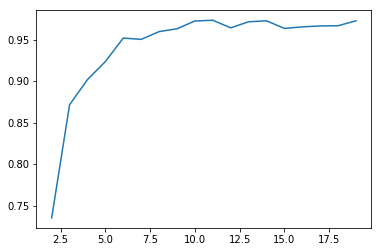

In [196]:
plt.plot(N,Scores)

In [200]:
# from the above work, we can find the dimension 11 is a good choice.

In [197]:
ICA = FastICA(n_components=11,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[0:40],X_ICA[50:70],X_ICA[80:90],X_ICA[160:220],X_ICA[230:600],X_ICA[610:800],X_ICA[810:890]))

In [201]:
# then to avoid overfitting, repeat the random split for 100 times and calculate the mean.
# Can also use cross_valid, but the effect won't be good since there are many classes but little samples, even some class with only 10 
# samples, so the cross_valid is not good here.

In [198]:
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.4)
    clf.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, clf.predict(xIca_test))+summary
a = summary/n
a

0.964657534246575

In [208]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(xgboost , X_ICA_labeled,target_labeled, cv=30) 
sum(a)/30

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


0.9393015873015874

In [209]:
# Then calculate the time.

In [251]:
import time
start =time.clock()
clf = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)
# your pragrama
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    clf.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, clf.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 16.845676700002514 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [211]:
# For all the work, I also find the the xgboost model a little overfitting, and the parameters can be improved.
# Now we consider this.

In [217]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [231]:
# first try to find the suitable value of n_estimators.

In [229]:
ICA = FastICA(n_components=11,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[0:40],X_ICA[50:70],X_ICA[80:90],X_ICA[160:220],X_ICA[230:600],X_ICA[610:800],X_ICA[810:890]))

cv_params = {'n_estimators': [10,20, 30, 40, 50, 60,70]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 30}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 40}
best score:0.9657534246575342


In [232]:
cv_params = {'n_estimators': [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 36}
best score:0.9671232876712329


In [233]:
# so now I can choose the n_estimator = 36
# The we try to estimate the suitable value of max_depth and min_child_weight.

In [234]:
cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 4, 'min_child_weight': 1}
best score:0.9671232876712329


In [235]:
# so now I can choose the max_depth =  4, the min_child_weight = 1.
# Then we try to estimate the best value of gamma.

In [236]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.2}
best score:0.9684931506849315


In [238]:
cv_params = {'gamma': [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.12}
best score:0.9698630136986301


In [239]:
# so now we can choose gamma = 0.12.
# Then we can try to estimate subsample and colsample_bytree.

In [241]:
cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.12, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.8, 'subsample': 0.6}
best score:0.9726027397260274


In [242]:
# Then we can choose subsample = 0.6 , and colsample_bytree = 0.8 .
# Next step we try to estimate reg_lambda.

In [246]:
cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3] , 'reg_alpha':[0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.12, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'reg_alpha': 0.05, 'reg_lambda': 1}
best score:0.9712328767123287


In [247]:
# Now the suitablle value of reg_lambda is about 1, the suitable value of reg_alpha can be about 0.05.
# Next is the last step and I should estimate the suitable value of learning_rate.

In [248]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.12, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 36, "reg_alpha": 0.05}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=40)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.4}
best score:0.9712328767123287


In [249]:
# so the learning_rate = 0.4 is a good choice.

In [250]:
# Now here is the new classifier model.

In [253]:
Xgboost = XGBClassifier(
    n_estimators=36,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.12,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

ICA = FastICA(n_components=11,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[0:40],X_ICA[50:70],X_ICA[80:90],X_ICA[160:220],X_ICA[230:600],X_ICA[610:800],X_ICA[810:890]))

In [258]:
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    Xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, Xgboost.predict(xIca_test))+summary
average = summary/n
average

0.9762557077625575

In [307]:
# Now after improve the parameters of xgboost model, we can now find the classification accuracy has improved a little(around 0.01).
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix and F1 score.
# Now the test accuracy can over 0.97 , the kappa is also around 0.97.

In [310]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
Xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, Xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, Xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, Xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, Xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, Xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, Xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, Xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, Xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9771689497716894
Kappa_train： 1.0
Kappa_test： 0.9707563294519816
F1_train： 1.0
F1_test： 0.9765458286006232
confusion_matrix_train：
[[147   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0]
 [  0   0  68   0   0   0   0]
 [  0   0   0 104   0   0   0]
 [  0   0   0   0  35   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[52  0  1  0  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0  0 46  0  0  0]
 [ 0  3  0  0 12  0  0]
 [ 0  1  0  0  0  7  0]
 [ 0  0  0  0  0  0  1]]


In [306]:
# then let us see how the tree is.

In [273]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [278]:
import xgboost as xgb
import pandas as pd

In [295]:
target_labeled = pd.DataFrame(target_labeled)
target_labeled.columns=["class"]

In [296]:
ICA_X = pd.DataFrame(X_ICA_labeled)
ICA_X.columns = ['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11']

XGBoost = xgb.XGBClassifier(
                            n_estimators=36,
                            learning_rate =0.4,
                            max_depth=4,
                            min_child_weight=1,
                            gamma=0.12,
                            subsample=0.6,
                            colsample_bytree=0.8,
                            objective= 'binary:logistic',
                            nthread=12,
                            reg_lambda=1,
                            seed=27)

XGBoost.fit(ICA_X,target_labeled)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.12, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=36, n_jobs=12, nthread=12, num_parallel_tree=1,
       objective='multi:softprob', random_state=27, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.6,
       tree_method='exact', validate_parameters=1, verbosity=None)

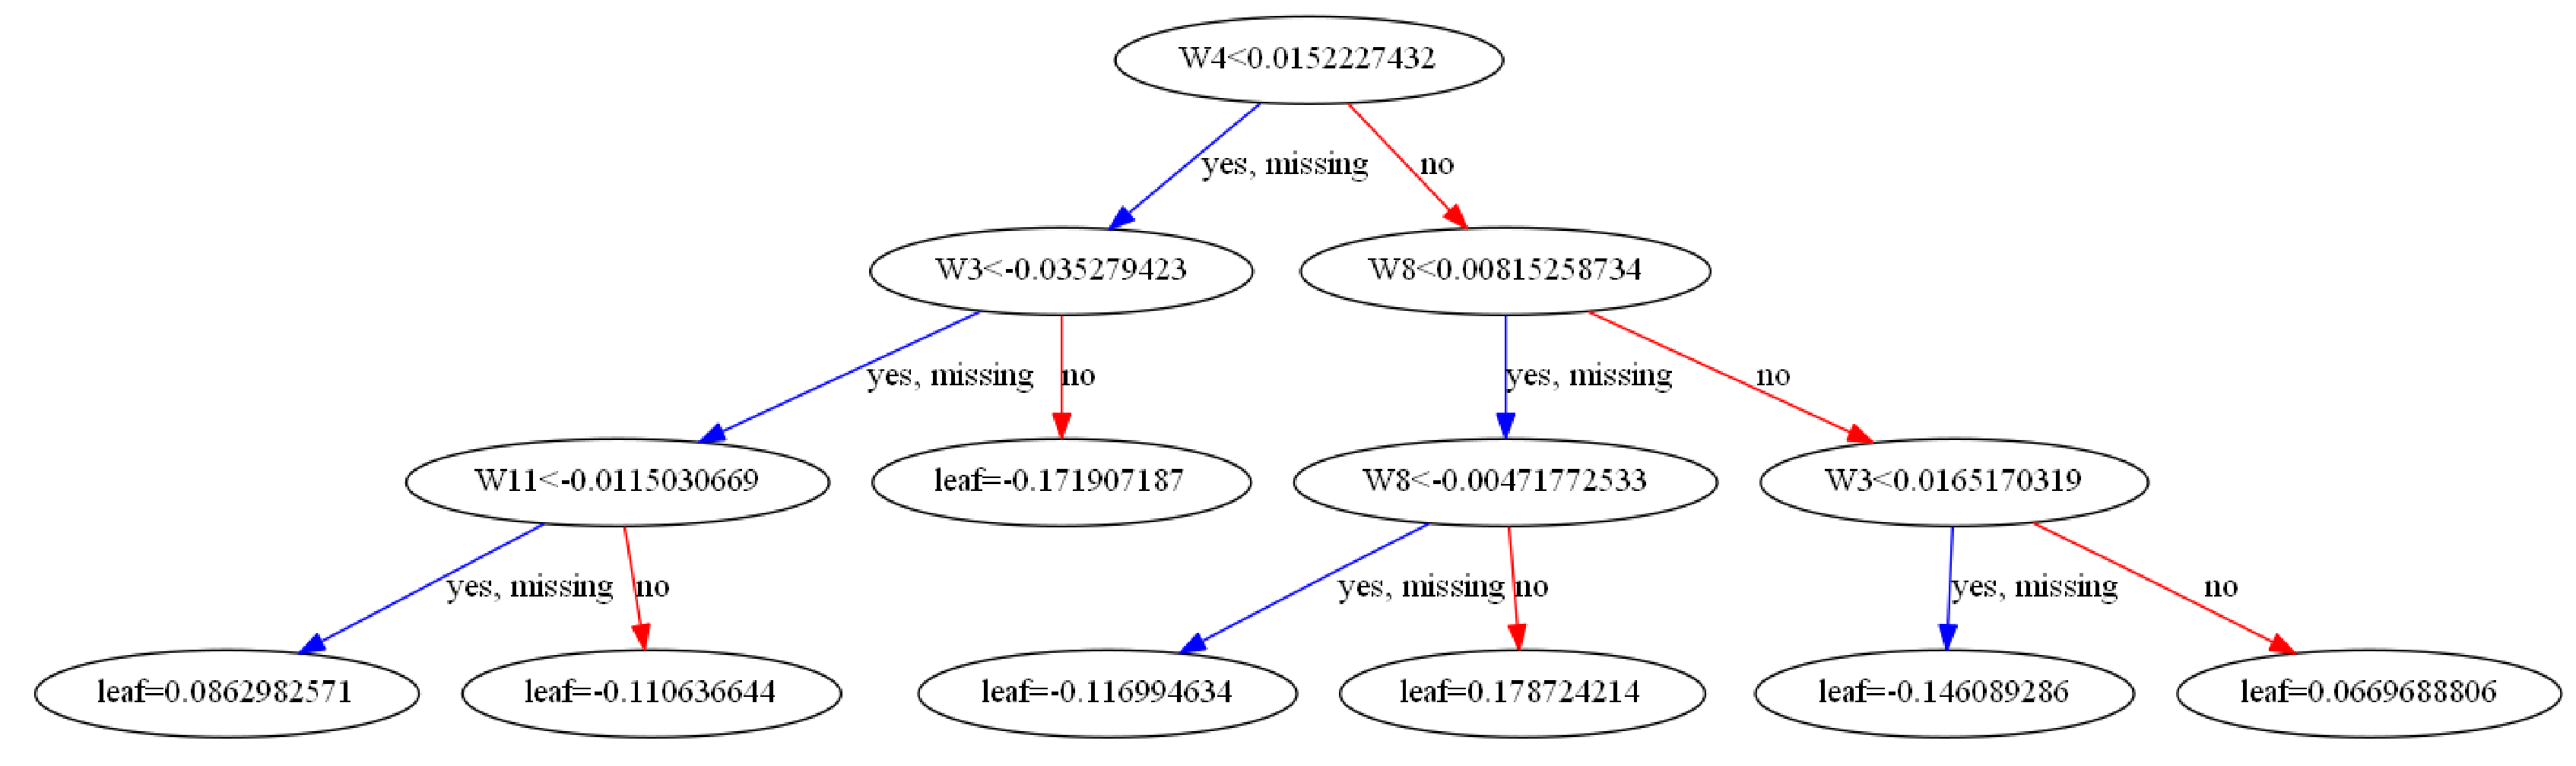

In [305]:
fig,ax = plt.subplots()
fig.set_size_inches(60,40)
xgb.plot_tree(XGBoost,ax = ax,num_trees=100)